In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.shape

In [ ]:
df.columns

In [5]:
df.sqft_basement.describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

In [4]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
df['waterfront'].unique()

array([nan,  0.,  1.])

In [10]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

88% of the data is no waterfront, less than 1% is waterfront, and 11% is missing (nan)
Dropping the variable because it's not healthy as a predictor

In [16]:
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [103]:
df_dropped = df.drop(columns=['waterfront','view', 'yr_renovated', 'lat', 'long', 'id', 'date','zipcode', 'sqft_basement', 'condition','sqft_above', 'bathrooms', 'sqft_lot15'], axis=1)

In [91]:
df_dropped.head()

,price,bedrooms,sqft_living,sqft_lot,floors,grade,yr_built
0,221900.0,3,1180,5650,1.0,7,1955
1,538000.0,3,2570,7242,2.0,7,1951
2,180000.0,2,770,10000,1.0,6,1933
3,604000.0,4,1960,5000,1.0,7,1965
4,510000.0,3,1680,8080,1.0,8,1987


In [20]:
pd.get_dummies(df_dropped['grade'])

,3,4,5,6,7,8,9,10,11,12,13
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,0


In [104]:
grade_dummies = pd.get_dummies(df_dropped['grade'], prefix="gd")

In [105]:
df_dropped = df_dropped.drop(['grade'], axis=1)

In [106]:
df_dropped = pd.concat([df_dropped, grade_dummies], axis=1)
df_dropped.head()

,price,bedrooms,sqft_living,sqft_lot,floors,yr_built,sqft_living15,gd_3,gd_4,gd_5,gd_6,gd_7,gd_8,gd_9,gd_10,gd_11,gd_12,gd_13
0,221900.0,3,1180,5650,1.0,1955,1340,0,0,0,0,1,0,0,0,0,0,0
1,538000.0,3,2570,7242,2.0,1951,1690,0,0,0,0,1,0,0,0,0,0,0
2,180000.0,2,770,10000,1.0,1933,2720,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,1960,5000,1.0,1965,1360,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,1680,8080,1.0,1987,1800,0,0,0,0,0,1,0,0,0,0,0


In [27]:
df_dropped.isna().sum()

price          0
bedrooms       0
sqft_living    0
sqft_lot       0
floors         0
yr_built       0
gd_3           0
gd_4           0
gd_5           0
gd_6           0
gd_7           0
gd_8           0
gd_9           0
gd_10          0
gd_11          0
gd_12          0
gd_13          0
dtype: int64

In [16]:
df_dropped.describe()

,price,bedrooms,sqft_living,sqft_lot,floors,grade,yr_built
count,2.159700e+04,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2080.321850,1.509941e+04,1.494096,0.000046,1970.999676
std,3.673681e+05,0.926299,918.106125,4.141264e+04,0.539683,0.006805,29.375234
min,7.800000e+04,1.000000,370.000000,5.200000e+02,1.000000,0.000000,1900.000000
25%,3.220000e+05,3.000000,1430.000000,5.040000e+03,1.000000,0.000000,1951.000000
50%,4.500000e+05,3.000000,1910.000000,7.618000e+03,1.500000,0.000000,1975.000000
75%,6.450000e+05,4.000000,2550.000000,1.068500e+04,2.000000,0.000000,1997.000000
max,7.700000e+06,33.000000,13540.000000,1.651359e+06,3.500000,1.000000,2015.000000


In [12]:
df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [18]:
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [19]:
df['condition'].unique()

array([3, 5, 4, 1, 2])

In [13]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [18]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 7 columns):
price          21597 non-null float64
bedrooms       21597 non-null int64
sqft_living    21597 non-null int64
sqft_lot       21597 non-null int64
floors         21597 non-null float64
grade          21597 non-null int64
yr_built       21597 non-null int64
dtypes: float64(2), int64(5)
memory usage: 1.2 MB


In [56]:
df_dropped.head(5)

,price,bedrooms,sqft_living,sqft_lot,floors,grade,yr_built,sqft_lot15
0,221900.0,3,1180,5650,1.0,7,1955,5650
1,538000.0,3,2570,7242,2.0,7,1951,7639
2,180000.0,2,770,10000,1.0,6,1933,8062
3,604000.0,4,1960,5000,1.0,7,1965,5000
4,510000.0,3,1680,8080,1.0,8,1987,7503


In [57]:
df_dropped.shape

(21597, 8)

In [9]:
df_dropped.corr()

,price,bedrooms,sqft_living,sqft_lot,floors,grade,yr_built,sqft_lot15
price,1.000000,0.308787,0.701917,0.089876,0.256804,0.667951,0.053953,0.082845
bedrooms,0.308787,1.000000,0.578212,0.032471,0.177944,0.356563,0.155670,0.030690
sqft_living,0.701917,0.578212,1.000000,0.173453,0.353953,0.762779,0.318152,0.184342
sqft_lot,0.089876,0.032471,0.173453,1.000000,-0.004814,0.114731,0.052946,0.718204
floors,0.256804,0.177944,0.353953,-0.004814,1.000000,0.458794,0.489193,-0.010722
grade,0.667951,0.356563,0.762779,0.114731,0.458794,1.000000,0.447865,0.120981
yr_built,0.053953,0.155670,0.318152,0.052946,0.489193,0.447865,1.000000,0.070777
sqft_lot15,0.082845,0.030690,0.184342,0.718204,-0.010722,0.120981,0.070777,1.000000


In [19]:
df_dropped.corr()

,price,bedrooms,sqft_living,sqft_lot,floors,grade,yr_built
price,1.000000,0.308787,0.701917,0.089876,0.256804,0.667951,0.053953
bedrooms,0.308787,1.000000,0.578212,0.032471,0.177944,0.356563,0.155670
sqft_living,0.701917,0.578212,1.000000,0.173453,0.353953,0.762779,0.318152
sqft_lot,0.089876,0.032471,0.173453,1.000000,-0.004814,0.114731,0.052946
floors,0.256804,0.177944,0.353953,-0.004814,1.000000,0.458794,0.489193
grade,0.667951,0.356563,0.762779,0.114731,0.458794,1.000000,0.447865
yr_built,0.053953,0.155670,0.318152,0.052946,0.489193,0.447865,1.000000


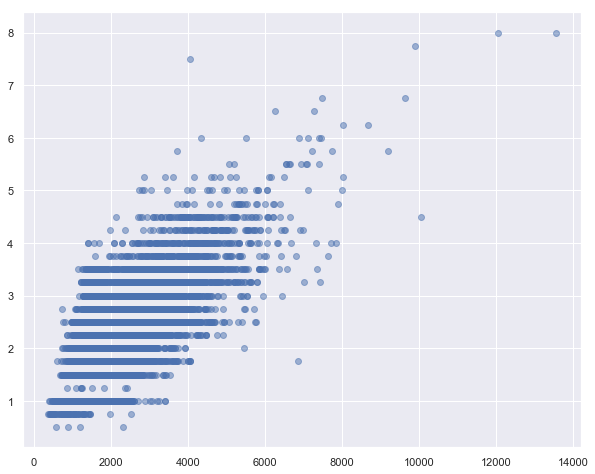

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(df_dropped['sqft_living'], df_dropped['bathrooms'], alpha=0.5)
plt.show()

In [63]:
df_dropped.shape

(21597, 8)

In [58]:
df_dropped['sqft_living'].sort_values().tail()

8085      9640
9245      9890
3910     10040
7245     12050
12764    13540
Name: sqft_living, dtype: int64

In [56]:
df_dropped.head()
df = df_dropped.drop(df_dropped.index[12764])
df_dropped.shape

(21597, 7)

In [57]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 7 columns):
price          21597 non-null float64
bedrooms       21597 non-null int64
sqft_living    21597 non-null int64
sqft_lot       21597 non-null int64
floors         21597 non-null float64
grade          21597 non-null int64
yr_built       21597 non-null int64
dtypes: float64(2), int64(5)
memory usage: 1.2 MB


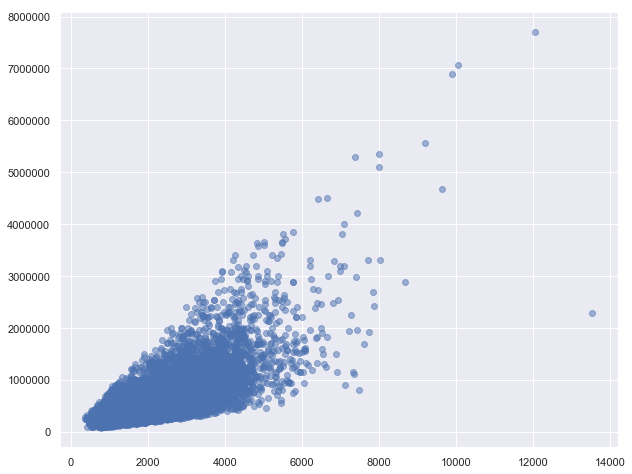

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(df_dropped['sqft_living'], df_dropped['price'], alpha=0.5)
plt.show()

In [22]:
df_dropped['condition'].unique()

array([3, 5, 4, 1, 2])

In [23]:
df_dropped['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [11]:
df_dropped.head()

,price,bedrooms,sqft_living,sqft_lot,floors,grade,yr_built,sqft_lot15
0,221900.0,3,1180,5650,1.0,7,1955,5650
1,538000.0,3,2570,7242,2.0,7,1951,7639
2,180000.0,2,770,10000,1.0,6,1933,8062
3,604000.0,4,1960,5000,1.0,7,1965,5000
4,510000.0,3,1680,8080,1.0,8,1987,7503


In [15]:
df_dropped['sqft_lot'].corr(df_dropped['sqft_lot15'])

0.7182040308060953

In [38]:
df_dropped['log_sqft_living'].describe()

count    21587.000000
mean         7.549972
std          0.422847
min          5.913503
25%          7.264380
50%          7.554859
75%          7.843849
max          8.972083
Name: log_sqft_living, dtype: float64

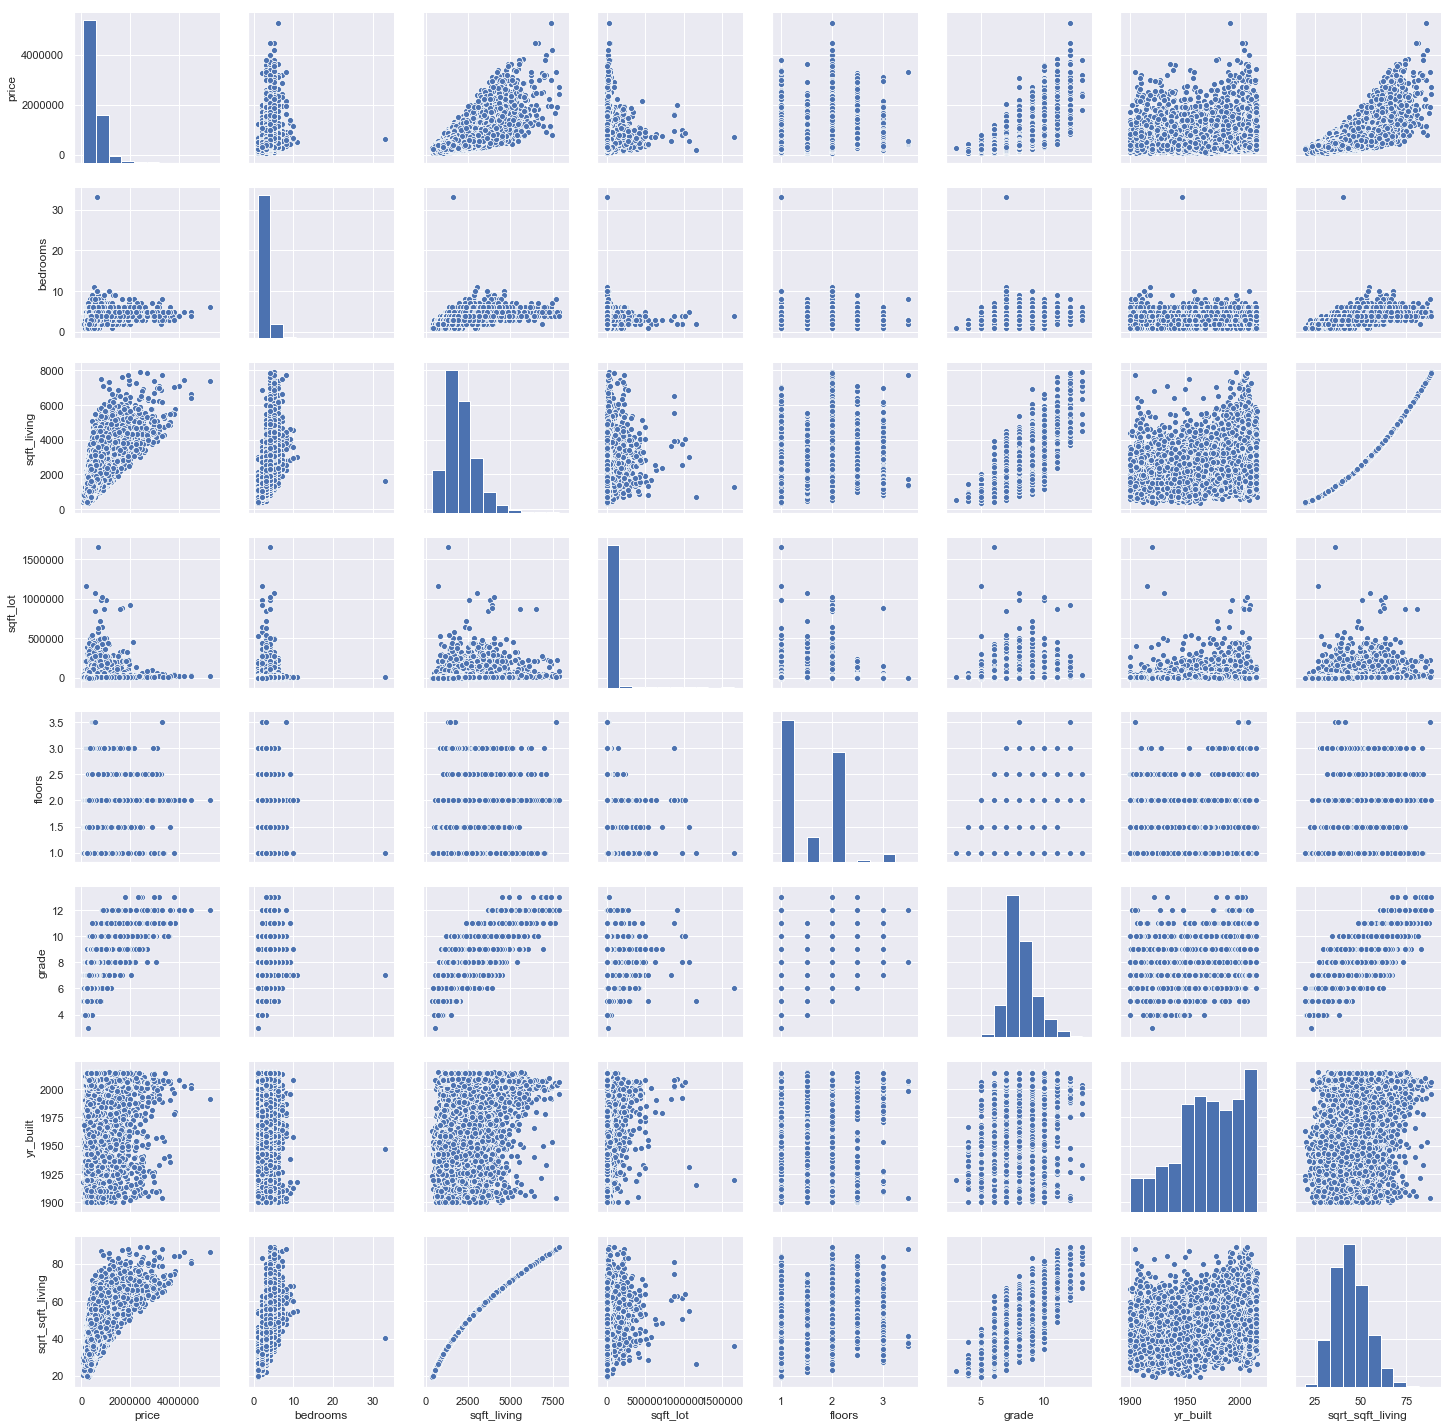

In [48]:
import seaborn as sns
sns.set()

sns.pairplot(df_dropped)

In [25]:
df_dropped.corr()

,price,bedrooms,sqft_living,sqft_lot,floors,grade,yr_built,sqft_lot15
price,1.000000,0.308787,0.701917,0.089876,0.256804,0.667951,0.053953,0.082845
bedrooms,0.308787,1.000000,0.578212,0.032471,0.177944,0.356563,0.155670,0.030690
sqft_living,0.701917,0.578212,1.000000,0.173453,0.353953,0.762779,0.318152,0.184342
sqft_lot,0.089876,0.032471,0.173453,1.000000,-0.004814,0.114731,0.052946,0.718204
floors,0.256804,0.177944,0.353953,-0.004814,1.000000,0.458794,0.489193,-0.010722
grade,0.667951,0.356563,0.762779,0.114731,0.458794,1.000000,0.447865,0.120981
yr_built,0.053953,0.155670,0.318152,0.052946,0.489193,0.447865,1.000000,0.070777
sqft_lot15,0.082845,0.030690,0.184342,0.718204,-0.010722,0.120981,0.070777,1.000000


In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

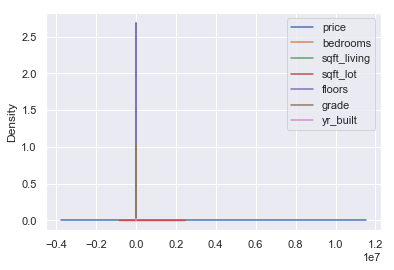

In [21]:
df_dropped.plot.kde()

In [24]:
f = 'price~sqft_living'
model = ols(formula=f, data=df_dropped).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 18 Jun 2019   Prob (F-statistic):               0.00
Time:                        07:40:40   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

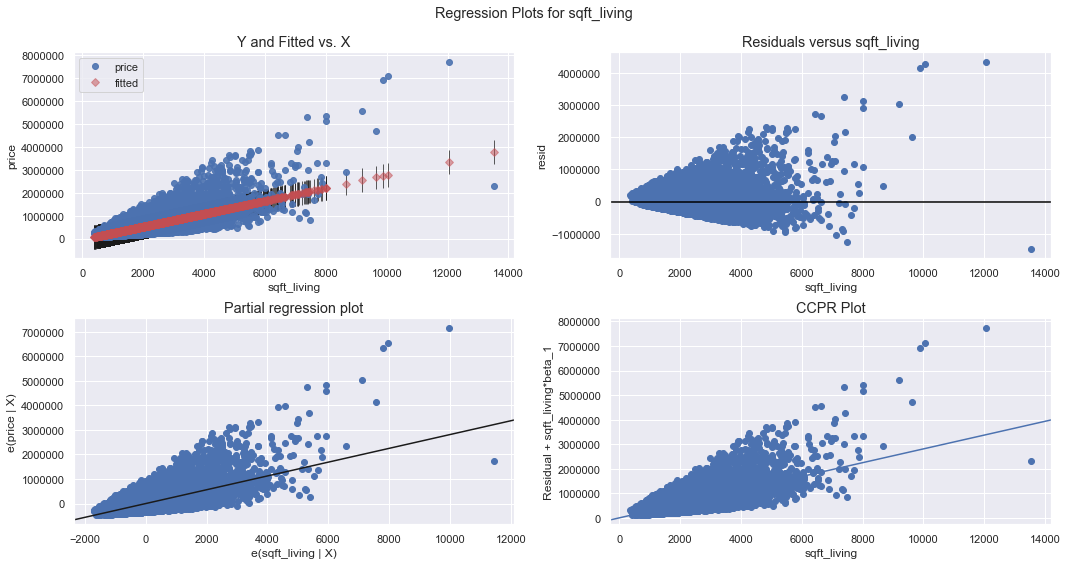

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig = fig)
plt.show()

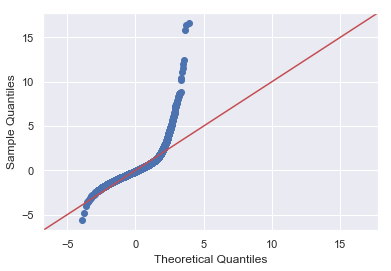

In [26]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist = stats.norm, line = '45', fit=True)

In [27]:
df_dropped.shape

(21597, 7)

In [29]:
df_dropped['sqft_living'].sort_values().tail(20)

1313      7390
10362     7400
11859     7420
12358     7440
4020      7480
14019     7620
18462     7710
16759     7730
19842     7850
13398     7880
1446      8000
1162      8010
18288     8020
14542     8670
4407      9200
8085      9640
9245      9890
3910     10040
7245     12050
12764    13540
Name: sqft_living, dtype: int64

In [107]:
indexNames = df_dropped[df_dropped['sqft_living'] >= 8000].index
df_dropped.drop(indexNames, inplace=True)
df_dropped.shape

(21587, 18)

In [52]:
import numpy as np
df_dropped['log_sqft_living'] = np.log(df_dropped['sqft_living'])

In [53]:
f = 'price~sqft_living'
model = ols(formula=f, data=df_dropped).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                 1.331e+04
Date:                Tue, 18 Jun 2019   Prob (F-statistic):               0.00
Time:                        08:07:35   Log-Likelihood:            -3.0116e+05
No. Observations:               21587   AIC:                         6.023e+05
Df Residuals:                   21585   BIC:                         6.023e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3.346e+06   3.37e+04    -99.223      0.000   -3.41e+06   -3.28e+06
log_sqft_living  5.144e+05   4459.137    115.364      0.000    5.06e+05    5.23e+05
==============================================================================
Omnibus:                    14488.085   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           339320.424
Skew:                           2.895   Prob(JB):                         0.00
Kurtosis:                      21.540   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

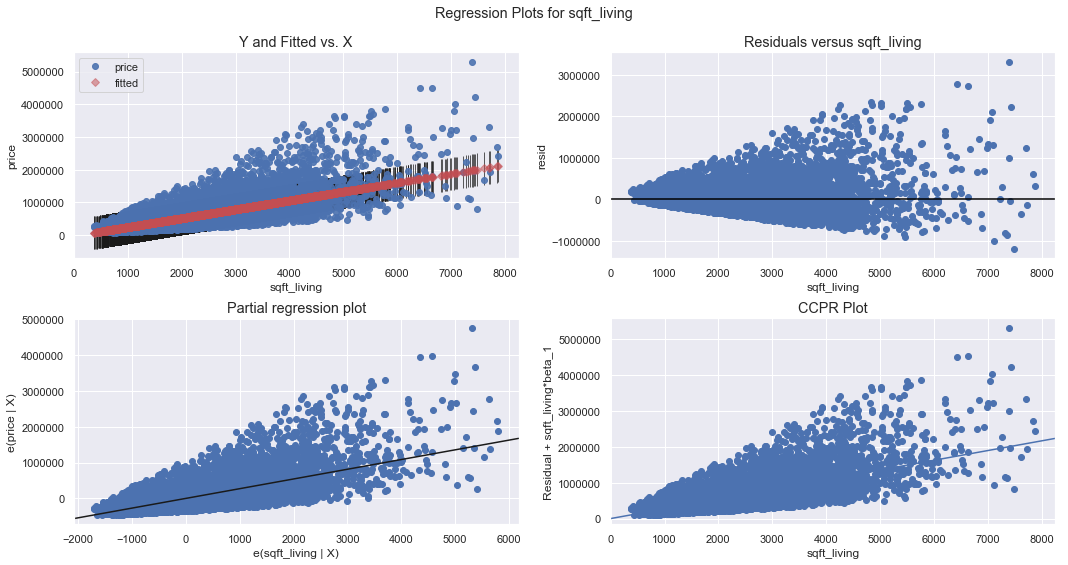

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig = fig)
plt.show()

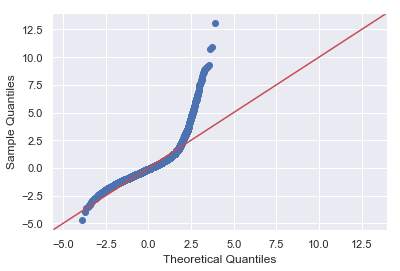

In [34]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist = stats.norm, line = '45', fit=True)

In [46]:
df_dropped['sqrt_sqft_living'] = np.sqrt(df_dropped['sqft_living']) 

In [30]:
df_dropped.corr()

,price,bedrooms,sqft_living,sqft_lot,floors,yr_built,gd_3,gd_4,gd_5,gd_6,gd_7,gd_8,gd_9,gd_10,gd_11,gd_12,gd_13
price,1.000000,0.309620,0.694294,0.089890,0.262133,0.055496,-0.005337,-0.032774,-0.087571,-0.216601,-0.324742,0.008509,0.248288,0.357106,0.365716,0.279046,0.131087
bedrooms,0.309620,1.000000,0.579768,0.030909,0.176979,0.155591,-0.017449,-0.068060,-0.113207,-0.239465,-0.104082,0.073871,0.160873,0.136174,0.115955,0.057041,0.026116
sqft_living,0.694294,0.579768,1.000000,0.171072,0.355695,0.322798,-0.011738,-0.054727,-0.128975,-0.316620,-0.361865,0.074794,0.325456,0.376523,0.348029,0.222807,0.097479
sqft_lot,0.089890,0.030909,0.171072,1.000000,-0.005926,0.052687,-0.000345,0.000459,0.023014,-0.018975,-0.067454,-0.023635,0.049898,0.074633,0.077218,0.057339,0.003998
floors,0.262133,0.176979,0.355695,-0.005926,1.000000,0.489436,-0.006230,-0.029960,-0.080329,-0.230478,-0.308025,0.201590,0.244472,0.174131,0.118498,0.052812,0.014953
yr_built,0.055496,0.155591,0.322798,0.052687,0.489436,1.000000,-0.011817,-0.041849,-0.128836,-0.313547,-0.211930,0.200016,0.220231,0.148901,0.099067,0.045314,0.006184
gd_3,-0.005337,-0.017449,-0.011738,-0.000345,-0.006230,-0.011817,1.000000,-0.000241,-0.000725,-0.002198,-0.005741,-0.004255,-0.002527,-0.001603,-0.000932,-0.000428,-0.000139
gd_4,-0.032774,-0.068060,-0.054727,0.000459,-0.029960,-0.041849,-0.000241,1.000000,-0.003768,-0.011426,-0.029850,-0.022121,-0.013138,-0.008333,-0.004844,-0.002225,-0.000723
gd_5,-0.087571,-0.113207,-0.128975,0.023014,-0.080329,-0.128836,-0.000725,-0.003768,1.000000,-0.034379,-0.089814,-0.066558,-0.039531,-0.025072,-0.014574,-0.006695,-0.002175
gd_6,-0.216601,-0.239465,-0.316620,-0.018975,-0.230478,-0.313547,-0.002198,-0.011426,-0.034379,1.000000,-0.272348,-0.201828,-0.119872,-0.076027,-0.044195,-0.020301,-0.006594


In [49]:
df_dropped.head()

,price,bedrooms,sqft_living,sqft_lot,floors,yr_built,gd_3,gd_4,gd_5,gd_6,gd_7,gd_8,gd_9,gd_10,gd_11,gd_12,gd_13
0,221900.0,3,1180,5650,1.0,1955,0,0,0,0,1,0,0,0,0,0,0
1,538000.0,3,2570,7242,2.0,1951,0,0,0,0,1,0,0,0,0,0,0
2,180000.0,2,770,10000,1.0,1933,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,1960,5000,1.0,1965,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,1680,8080,1.0,1987,0,0,0,0,0,1,0,0,0,0,0


In [108]:
df_dropped['bedrooms'].describe()
df_dropped.shape
df_dropped['bedrooms'].sort_values().tail(20)

indexNames2 = df_dropped[df_dropped['bedrooms'] >= 10].index
df_dropped.drop(indexNames2, inplace=True)
df_dropped.shape

(21582, 18)

In [109]:
indexNames3 = df_dropped[df_dropped['sqft_lot'] > 1000000].index
df_dropped.drop(indexNames3, inplace=True)
df_dropped.shape

(21578, 18)

In [71]:
df_dropped['yr_built'].describe()

count    21578.000000
mean      1971.005469
std         29.366533
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [70]:
df_dropped['floors'].sort_values().head(20)

0        1.0
11155    1.0
11157    1.0
11158    1.0
11162    1.0
11164    1.0
11165    1.0
11166    1.0
11167    1.0
11171    1.0
11172    1.0
11173    1.0
11178    1.0
11179    1.0
11180    1.0
11181    1.0
11182    1.0
11183    1.0
11184    1.0
11185    1.0
Name: floors, dtype: float64

In [64]:
df_dropped['sqft_lot'].sort_values().head(20)

15729    520
5821     572
7582     600
3449     609
20588    635
21536    638
547      649
4348     649
19646    651
21503    675
7206     676
21365    681
20079    683
20978    690
15655    690
20728    696
21121    698
10600    700
17996    704
20715    705
Name: sqft_lot, dtype: int64

In [60]:
df_dropped['sqft_living'].sort_values().tail(20)

12859    6980
15468    7000
7028     7050
4145     7080
7900     7100
21034    7120
6495     7220
21490    7270
18579    7320
2711     7350
1313     7390
10362    7400
11859    7420
12358    7440
4020     7480
14019    7620
18462    7710
16759    7730
19842    7850
13398    7880
Name: sqft_living, dtype: int64

In [110]:
df_dropped.head()

,price,bedrooms,sqft_living,sqft_lot,floors,yr_built,sqft_living15,gd_3,gd_4,gd_5,gd_6,gd_7,gd_8,gd_9,gd_10,gd_11,gd_12,gd_13
0,221900.0,3,1180,5650,1.0,1955,1340,0,0,0,0,1,0,0,0,0,0,0
1,538000.0,3,2570,7242,2.0,1951,1690,0,0,0,0,1,0,0,0,0,0,0
2,180000.0,2,770,10000,1.0,1933,2720,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,1960,5000,1.0,1965,1360,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,1680,8080,1.0,1987,1800,0,0,0,0,0,1,0,0,0,0,0


In [77]:
df_dropped.shape

(21578, 17)

In [111]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [112]:
formula = "price ~ sqft_living+floors+bedrooms+sqft_living15+yr_built+gd_3+gd_4+gd_5+gd_6+gd_7+gd_8+gd_9+gd_10+gd_11+gd_12+gd_13"
model = ols(formula= formula, data=df_dropped).fit()

In [121]:
outcome = 'price'
predictors = df_dropped.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [113]:
model = ols(formula= formula, data=df_dropped).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     2488.
Date:                Tue, 18 Jun 2019   Prob (F-statistic):               0.00
Time:                        09:46:12   Log-Likelihood:            -2.9537e+05
No. Observations:               21578   AIC:                         5.908e+05
Df Residuals:                   21562   BIC:                         5.909e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.844e+06   1.09e+05     62.711      0.000    6.63e+06    7.06e+06
sqft_living     151.6502      3.336     45.453      0.000     145.111     158.190
floors         4.539e+04   3304.953     13.735      0.000    3.89e+04    5.19e+04
bedrooms      -2.455e+04   2099.802    -11.692      0.000   -2.87e+04   -2.04e+04
sqft_living15    34.7581      3.505      9.916      0.000      27.888      41.629
yr_built      -3573.2538     60.424    -59.136      0.000   -3691.690   -3454.818
gd_3           1.321e+05   1.96e+05      0.674      0.500   -2.52e+05    5.16e+05
gd_4           1.236e+05   4.32e+04      2.860      0.004    3.89e+04    2.08e+05
gd_5           1.327e+05   2.48e+04      5.348      0.000    8.41e+04    1.81e+05
gd_6            1.85e+05    2.2e+04      8.425      0.000    1.42e+05    2.28e+05
gd_7           2.812e+05   2.19e+04     12.818      0.000    2.38e+05    3.24e+05
gd_8           3.818e+05   2.21e+04     17.249      0.000    3.38e+05    4.25e+05
gd_9           5.173e+05   2.24e+04     23.049      0.000    4.73e+05    5.61e+05
gd_10           7.08e+05    2.3e+04     30.786      0.000    6.63e+05    7.53e+05
gd_11          9.811e+05   2.47e+04     39.687      0.000    9.33e+05    1.03e+06
gd_12          1.453e+06   3.15e+04     46.118      0.000    1.39e+06    1.51e+06
gd_13          1.948e+06   6.92e+04     28.143      0.000    1.81e+06    2.08e+06
==============================================================================
Omnibus:                    12025.464   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           250174.359
Skew:                           2.249   Prob(JB):                         0.00
Kurtosis:                      19.063   Cond. No.                     2.45e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.64e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""